In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('fibvid_evaluation_multiple.csv')

In [6]:
df.head()

,tweet_user,tweet_id,like_count,depth,parent_user,create_date,parent_id,retweet_count,post_text,claim_number,group,hashtag,Cohere-Command-R-Plus
0,64,1260590991641362436,301,0,0,2020-05-13T15:21:27.000Z,0,113,So you left a 69 page guidebook but no PPE or ...,141,1,NaN,"conspiracy, emotion, trolling"
1,135,1288771853822103552,194,0,0,2020-07-30T09:42:08.000Z,0,99,More tales from the NHS frontline are emerging...,138,0,NaN,"conspiracy, emotion"
2,290,1251209120528637952,7650,0,0,2020-04-17T18:01:15.000Z,0,4279,DEVELOPING: A crowd of protesters could be see...,30,0,NaN,"conspiracy, emotion"
3,361,1339567071588442113,621,0,0,2020-12-17T13:44:12.000Z,0,231,"Latest we expect on checks, *as of now*, per a...",285,3,NaN,Conspiracy
4,457,1265997510738358272,959,0,0,2020-05-28T13:25:02.000Z,0,271,Wisconsin election officials agree to send vot...,35,3,NaN,conspiracy


In [7]:
df['depth'].unique()
# depth 0 -> original tweet / depth 1 -> retweeted tweet from the orignal tweet / depth 2 -> retweeted tweet from the retweeted tweet (detph 1 tweet) / ///
# q: whether the manipulation technique evolve as its being retweeted? "manipulation technique"
# besides correlation and the depth, the more anlaysis the better.

array([0, 1, 3, 2, 4, 5, 6])

In [8]:
df = pd.read_csv('fibvid_evaluation_multiple.csv')
import ast

# replace "," with ", " in the techniques column
df["Cohere-Command-R-Plus"] = df["Cohere-Command-R-Plus"].apply(lambda x: str(x).lower())
df["Cohere-Command-R-Plus"] = df["Cohere-Command-R-Plus"].apply(lambda x: str(x).replace(", ", ","))
df["Cohere-Command-R-Plus"] = df["Cohere-Command-R-Plus"].apply(lambda x: str(x).replace(".", ""))
df.head()

,tweet_user,tweet_id,like_count,depth,parent_user,create_date,parent_id,retweet_count,post_text,claim_number,group,hashtag,Cohere-Command-R-Plus
0,64,1260590991641362436,301,0,0,2020-05-13T15:21:27.000Z,0,113,So you left a 69 page guidebook but no PPE or ...,141,1,NaN,"conspiracy,emotion,trolling"
1,135,1288771853822103552,194,0,0,2020-07-30T09:42:08.000Z,0,99,More tales from the NHS frontline are emerging...,138,0,NaN,"conspiracy,emotion"
2,290,1251209120528637952,7650,0,0,2020-04-17T18:01:15.000Z,0,4279,DEVELOPING: A crowd of protesters could be see...,30,0,NaN,"conspiracy,emotion"
3,361,1339567071588442113,621,0,0,2020-12-17T13:44:12.000Z,0,231,"Latest we expect on checks, *as of now*, per a...",285,3,NaN,conspiracy
4,457,1265997510738358272,959,0,0,2020-05-28T13:25:02.000Z,0,271,Wisconsin election officials agree to send vot...,35,3,NaN,conspiracy


In [9]:
# Define the six techniques
techniques = {"polarization", "conspiracy", "emotion", "trolling", "impersonation", "discredit"}

# Function to count each technique individually
def count_techniques(row):
    if not row or pd.isna(row):  # Handle empty or NaN rows
        return ["none"]
    filtered = [tech.strip() for tech in row.split(',') if tech.strip() in techniques]
    return filtered if filtered else ["none"]

# Expand the column into individual techniques
df['Individual_Techniques'] = df['Cohere-Command-R-Plus'].apply(count_techniques)

# Flatten the list of techniques and count occurrences
from itertools import chain
all_techniques = list(chain.from_iterable(df['Individual_Techniques']))
technique_counts = pd.Series(all_techniques).value_counts()

# Ensure all categories (6 techniques + "none") are included
categories = list(techniques) + ["none"]
technique_counts = technique_counts.reindex(categories, fill_value=0)

# Convert to DataFrame for display
final_counts_df = technique_counts.reset_index()
final_counts_df.columns = ['Technique', 'Count']

# Display the resulting DataFrame
print(final_counts_df)

       Technique   Count
0      discredit   43509
1       trolling   82463
2   polarization    4533
3        emotion   92999
4     conspiracy  138873
5  impersonation    9784
6           none   18305


In [10]:
import pandas as pd

# Example DataFrame loading step (replace with your actual data loading method)
# df = pd.read_csv('your_dataset.csv')

# Define the techniques
techniques = ["polarization", "conspiracy", "emotion", "trolling", "impersonation", "discredit"]

# Initialize a dictionary to hold the prevalence of joint techniques
joint_techniques_prevalence = {}

for technique_combo in df['Cohere-Command-R-Plus']:
    # Check for null or empty technique_combo
    if pd.isna(technique_combo) or technique_combo.strip() == '':
        continue  # Skip this iteration if the data is null or empty

    # Split techniques into list, filter by defined techniques, and sort to handle different orderings
    technique_list = [tech.strip() for tech in technique_combo.split(",") if tech.strip() in techniques]
    technique_list.sort()
    techniques_key = ",".join(technique_list)

    # Avoid adding empty keys if no valid techniques found
    if not techniques_key:
        continue

    if techniques_key not in joint_techniques_prevalence:
        joint_techniques_prevalence[techniques_key] = 0
    joint_techniques_prevalence[techniques_key] += 1

# Convert the dictionary to a DataFrame for easier sorting and analysis
joint_techniques_df = pd.DataFrame.from_dict(joint_techniques_prevalence, orient='index', columns=['Count'])
joint_techniques_df.index.name = 'Technique Combination'
joint_techniques_df.reset_index(inplace=True)

# Calculate prevalence
joint_techniques_df['Prevalence'] = joint_techniques_df['Count'] / len(df)

# Sort by prevalence in descending order and get the top 10
top_10_joint_techniques = joint_techniques_df.sort_values(by='Prevalence', ascending=False).head(10)

# Display the top 10
print("Top 10 Joint Techniques by Prevalence:")
print(top_10_joint_techniques[['Technique Combination', 'Prevalence']])

Top 10 Joint Techniques by Prevalence:
                    Technique Combination  Prevalence
2                              conspiracy    0.185656
5                                trolling    0.152531
1                      conspiracy,emotion    0.123605
0             conspiracy,emotion,trolling    0.091687
3                    conspiracy,discredit    0.071705
14                                emotion    0.049857
7            conspiracy,discredit,emotion    0.040583
11                    conspiracy,trolling    0.037984
6                        emotion,trolling    0.030793
9   conspiracy,discredit,emotion,trolling    0.028678


In [11]:
# Define the techniques
techniques = ["polarization", "conspiracy", "emotion", "trolling", "impersonation", "discredit"]

# Initialize a dictionary to hold the prevalence of joint techniques
joint_techniques_prevalence = {}

for technique_combo in df['Cohere-Command-R-Plus']:
    # Check for null or empty technique_combo
    if pd.isna(technique_combo) or technique_combo.strip() == '':
        continue  # Skip this iteration if the data is null or empty

    # Split techniques into list, filter by defined techniques, and sort to handle different orderings
    technique_list = [tech.strip() for tech in technique_combo.split(",") if tech.strip() in techniques]
    technique_list.sort()

    # Continue only if there are at least two different techniques
    if len(technique_list) < 2:
        continue

    techniques_key = ",".join(technique_list)

    # Avoid adding empty or single-technique keys
    if techniques_key and ',' in techniques_key:  # Check ',' to ensure multiple techniques
        if techniques_key not in joint_techniques_prevalence:
            joint_techniques_prevalence[techniques_key] = 0
        joint_techniques_prevalence[techniques_key] += 1

# Convert the dictionary to a DataFrame for easier sorting and analysis
joint_techniques_df = pd.DataFrame.from_dict(joint_techniques_prevalence, orient='index', columns=['Count'])
joint_techniques_df.index.name = 'Technique Combination'
joint_techniques_df.reset_index(inplace=True)

# Calculate prevalence
joint_techniques_df['Prevalence'] = joint_techniques_df['Count'] / len(df)

# Sort by prevalence in descending order and get the top 10
top_10_joint_techniques = joint_techniques_df.sort_values(by='Prevalence', ascending=False).head(10)

# Display the top 10
print("Top 10 Joint Techniques by Prevalence:")
print(top_10_joint_techniques[['Technique Combination', 'Prevalence']])

Top 10 Joint Techniques by Prevalence:
                                Technique Combination  Prevalence
1                                  conspiracy,emotion    0.123605
0                         conspiracy,emotion,trolling    0.091687
2                                conspiracy,discredit    0.071705
5                        conspiracy,discredit,emotion    0.040583
9                                 conspiracy,trolling    0.037984
4                                    emotion,trolling    0.030793
7               conspiracy,discredit,emotion,trolling    0.028678
14                   conspiracy,emotion,impersonation    0.014102
8                            conspiracy,impersonation    0.010621
17  conspiracy,discredit,emotion,impersonation,tro...    0.008615


In [12]:
import pandas as pd

# Example DataFrame loading step (replace with your actual data loading method)
# df = pd.read_csv('your_dataset.csv')

# Define the list of recognized techniques
techniques = ["polarization", "conspiracy", "emotion", "trolling", "impersonation", "discredit"]

# Function to count the number of valid techniques in each claim
def count_techniques(technique_combo):
    if pd.isna(technique_combo):
        return 0  # Return 0 if the field is NaN
    technique_list = [tech.strip() for tech in technique_combo.split(",") if tech.strip() in techniques]
    return len(technique_list)

# Apply the function to each row in the DataFrame
df['Technique_Count'] = df['Cohere-Command-R-Plus'].apply(count_techniques)

# Calculate the number of claims for each count of techniques
technique_count_distribution = df['Technique_Count'].value_counts().sort_index()

# Convert to DataFrame for display
technique_count_distribution_df = technique_count_distribution.reset_index()
technique_count_distribution_df.columns = ['Number of Techniques', 'Number of Claims']

# Display the DataFrame
print(technique_count_distribution_df)

   Number of Techniques  Number of Claims
0                     0             18305
1                     1             92856
2                     2             63452
3                     3             36575
4                     4              7855
5                     5              2004
6                     6               206


In [18]:
df.head()

,tweet_user,tweet_id,like_count,depth,parent_user,create_date,parent_id,retweet_count,post_text,claim_number,group,hashtag,Cohere-Command-R-Plus,Individual_Techniques,Technique_Count
0,64,1260590991641362436,301,0,0,2020-05-13T15:21:27.000Z,0,113,So you left a 69 page guidebook but no PPE or ...,141,1,NaN,"conspiracy,emotion,trolling","[conspiracy, emotion, trolling]",3
1,135,1288771853822103552,194,0,0,2020-07-30T09:42:08.000Z,0,99,More tales from the NHS frontline are emerging...,138,0,NaN,"conspiracy,emotion","[conspiracy, emotion]",2
2,290,1251209120528637952,7650,0,0,2020-04-17T18:01:15.000Z,0,4279,DEVELOPING: A crowd of protesters could be see...,30,0,NaN,"conspiracy,emotion","[conspiracy, emotion]",2
3,361,1339567071588442113,621,0,0,2020-12-17T13:44:12.000Z,0,231,"Latest we expect on checks, *as of now*, per a...",285,3,NaN,conspiracy,[conspiracy],1
4,457,1265997510738358272,959,0,0,2020-05-28T13:25:02.000Z,0,271,Wisconsin election officials agree to send vot...,35,3,NaN,conspiracy,[conspiracy],1


Impact - pearson/spearman correlation

In [21]:
from scipy.stats import spearmanr

# change the code with our data.
# Predefined techniques
predefined_techniques = [
    ['conspiracy', 'emotion', 'discredit', 'trolling', 'impersonation', 'polarization']
]

# Step 1: One-hot encode the techniques in 'Techniques Summary'
# for technique in predefined_techniques:
    # df[technique] = df["Cohere-Command-R-Plus"].str.contains(technique, na=False).astype(int)

# Split the data into true and false claims
# df_true = df[df["Ground Truth"] == True]
# df_false = df[df["Ground Truth"] == False]

# Step 2: Compute pairwise correlations for techniques and engagement metrics
def compute_group_correlations(data, techniques, engagement_columns):
    correlation_results = []
    for technique in techniques:
        for metric in engagement_columns:
            corr, p_value = spearmanr(data[technique], data[metric])
            correlation_results.append({
                "Technique": technique,
                "Metric": metric,
                "Correlation": corr,
                "P-Value": p_value
            })
    return correlation_results

# Correlations for true and false claims separately
engagement_columns = ["like_count", "retweet_count"]
correlation_results = compute_group_correlations(df, predefined_techniques, engagement_columns)
# false_correlation_results = compute_group_correlations(df_false, "False", predefined_techniques, engagement_columns)

# Combine results
group_correlation_df = pd.DataFrame(correlation_results)
print(group_correlation_df)
# group_false_correlation_df = pd.DataFrame(false_correlation_results)
# significant_group_correlation_df = group_correlation_df[group_correlation_df["P-Value"] < 0.05]
# significant_group_false_correlation_df = group_false_correlation_df[group_false_correlation_df["P-Value"] < 0.05]

KeyError: "None of [Index(['conspiracy', 'emotion', 'discredit', 'trolling', 'impersonation',\n       'polarization'],\n      dtype='object')] are in the [columns]"

## Pearson/Spearman correlation and analysis

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Load the dataset
df = pd.read_csv('fibvid_evaluation_multiple.csv')  # Replace with your actual file name

# Define the predefined techniques based on the data
predefined_techniques = ['conspiracy', 'emotion', 'trolling', 'impersonation', 'discredit', 'polarization']

# One-hot encode the techniques
for technique in predefined_techniques:
    df[technique] = df["Cohere-Command-R-Plus"].str.contains(technique, na=False).astype(int)

# Calculate engagement metrics
engagement_columns = ["like_count", "retweet_count"]
correlation_results = []

# Calculate correlations for each technique
for technique in predefined_techniques:
    for metric in engagement_columns:
        # Calculate Pearson correlation
        pearson_corr, pearson_p = pearsonr(df[technique], df[metric])
        correlation_results.append({
            'Technique': technique,
            'Metric': metric,
            'Correlation': pearson_corr,
            'P-Value': pearson_p,
            'Type': 'Pearson'
        })

        # Calculate Spearman correlation
        spearman_corr, spearman_p = spearmanr(df[technique], df[metric])
        correlation_results.append({
            'Technique': technique,
            'Metric': metric,
            'Correlation': spearman_corr,
            'P-Value': spearman_p,
            'Type': 'Spearman'
        })

# Store results in a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Display the correlation results
print("Full Correlation Results:")
print(correlation_df)

# Display significant correlations (p-value < 0.05)
significant_correlations = correlation_df[correlation_df['P-Value'] < 0.05]
print("\nSignificant Correlations (p-value < 0.05):")
print(significant_correlations)

# Display technique counts
technique_counts = df[predefined_techniques].sum()
print("\nTechnique Counts:")
print(technique_counts)


Full Correlation Results:
        Technique         Metric  Correlation        P-Value      Type
0      conspiracy     like_count     0.013243   4.681504e-10   Pearson
1      conspiracy     like_count     0.025420   5.848841e-33  Spearman
2      conspiracy  retweet_count     0.015836   9.387762e-14   Pearson
3      conspiracy  retweet_count     0.070999  3.846217e-245  Spearman
4         emotion     like_count     0.011912   2.100722e-08   Pearson
5         emotion     like_count     0.026378   2.323238e-35  Spearman
6         emotion  retweet_count     0.013814   8.134008e-11   Pearson
7         emotion  retweet_count     0.063251  6.774567e-195  Spearman
8        trolling     like_count    -0.015722   1.408879e-13   Pearson
9        trolling     like_count     0.001095   6.065266e-01  Spearman
10       trolling  retweet_count    -0.015352   5.132095e-13   Pearson
11       trolling  retweet_count    -0.011721   3.518920e-08  Spearman
12  impersonation     like_count     0.001245   5.5

This result provides a comprehensive analysis of the correlations between different manipulation techniques and engagement metrics (likes and retweets) in the dataset. Let's break down the interpretation:

1. Correlation Strength:
   - The correlation coefficients range from -1 to 1, where:
     - 0 to 0.3 (or 0 to -0.3) indicates a weak correlation
     - 0.3 to 0.7 (or -0.3 to -0.7) indicates a moderate correlation
     - 0.7 to 1 (or -0.7 to -1) indicates a strong correlation

2. Significant Correlations:
   - All correlations with p-values < 0.05 are considered statistically significant, meaning the relationship is unlikely to occur by chance.

3. Interpretation of Results:

   a. Conspiracy:
      - Shows weak positive correlations with both likes and retweets.
      - The strongest correlation is with retweets (Spearman: 0.070999), suggesting conspiracy content slightly increases retweets.

   b. Emotion:
      - Also shows weak positive correlations with likes and retweets.
      - Slightly stronger correlation with retweets (Spearman: 0.063251), indicating emotional content may increase retweets more than likes.

   c. Trolling:
      - Shows very weak negative correlations, especially with likes.
      - This suggests trolling might slightly decrease engagement.

   d. Impersonation:
      - Shows a very weak negative correlation with likes (Spearman: -0.028170).
      - No significant correlation with retweets.

   e. Discredit:
      - Weak positive correlations with both likes and retweets.
      - Strongest correlation is with retweets (Spearman: 0.069749), similar to conspiracy content.

   f. Polarization:
      - Very weak correlations, slightly negative for likes and slightly positive for retweets.

4. Pearson vs. Spearman:
   - Spearman correlations are generally stronger, suggesting non-linear relationships between techniques and engagement.

5. Technique Counts:
   - Conspiracy is the most common technique (130,794 occurrences), followed by emotion (85,055) and trolling (78,202).
   - Polarization is the least common (4,541 occurrences).

Overall, while all correlations are statistically significant due to the large sample size, they are generally weak. Conspiracy and emotion techniques show the strongest positive correlations with engagement, particularly retweets. Trolling shows a slight negative correlation with engagement. The prevalence of conspiracy techniques in the dataset is notable and may warrant further investigation.


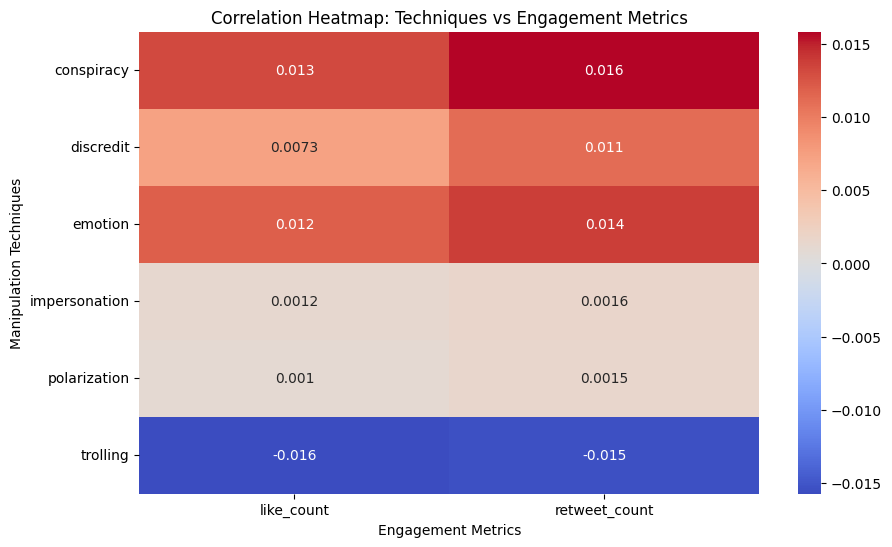

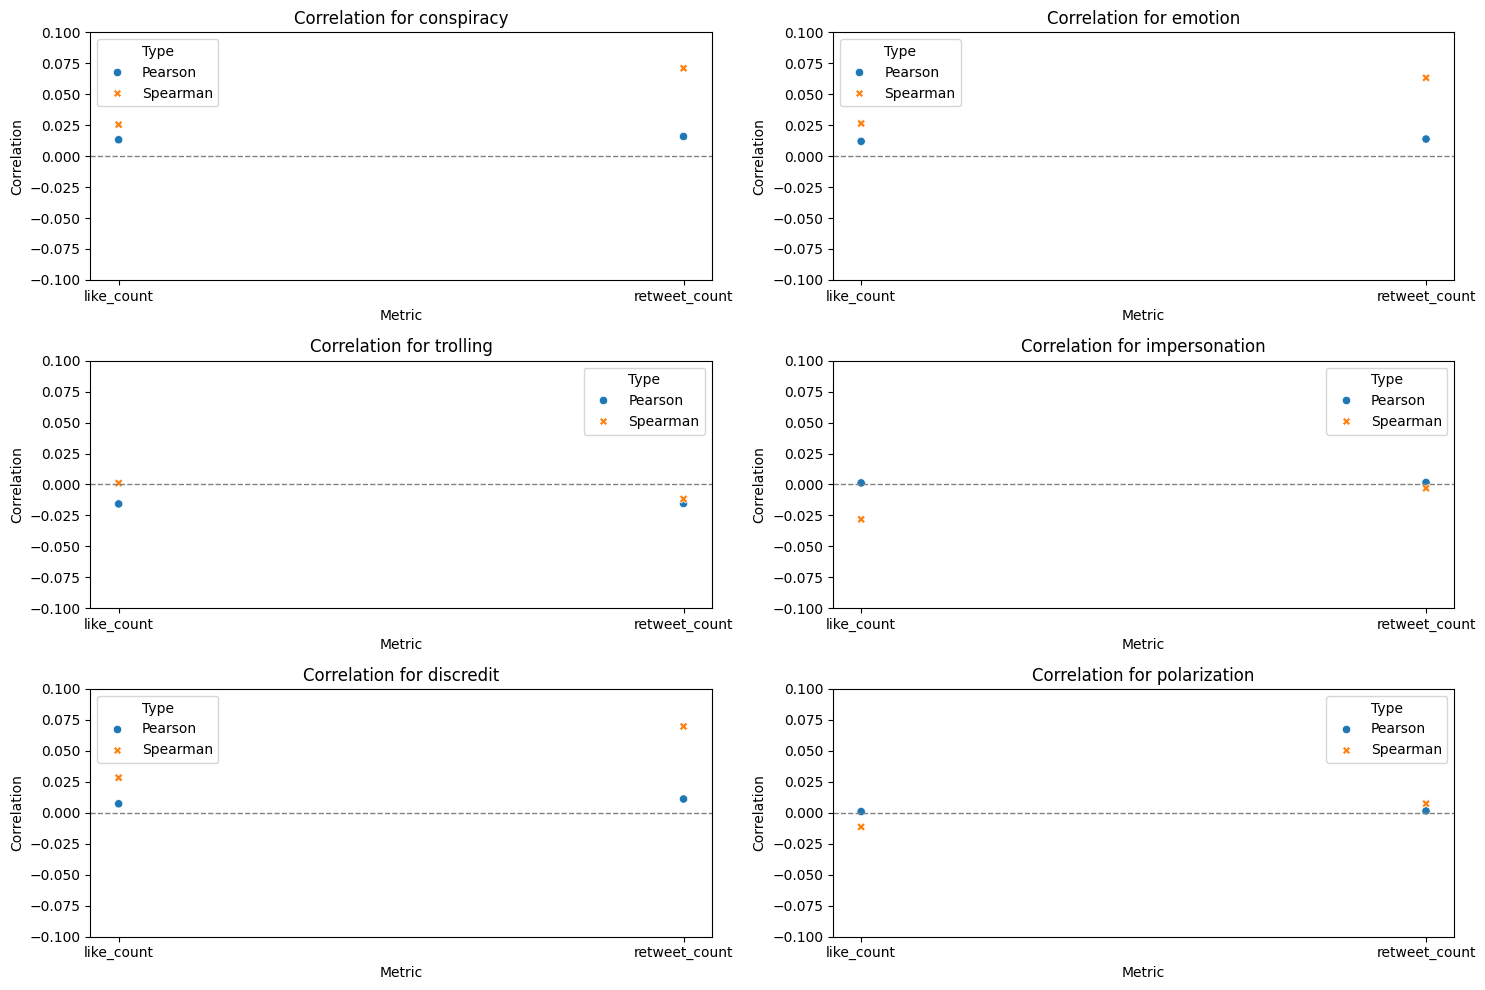

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated the correlations and stored them in correlation_df
# If not, use the correlation_df from your previous analysis

# Create a heatmap for the correlation coefficients
plt.figure(figsize=(10, 6))
heatmap_data = correlation_df.pivot_table(index='Technique', columns='Metric', values='Correlation', aggfunc='first')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Techniques vs Engagement Metrics')
plt.xlabel('Engagement Metrics')
plt.ylabel('Manipulation Techniques')
plt.show()

# Create scatter plots for each technique
plt.figure(figsize=(15, 10))
techniques = correlation_df['Technique'].unique()

for i, technique in enumerate(techniques, 1):
    plt.subplot(3, 2, i)
    tech_data = correlation_df[correlation_df['Technique'] == technique]
    sns.scatterplot(data=tech_data, x='Metric', y='Correlation', hue='Type', style='Type')
    plt.title(f'Correlation for {technique}')
    plt.axhline(0, color='grey', lw=1, ls='--')
    plt.ylim(-0.1, 0.1)  # Adjust based on your correlation range

plt.tight_layout()
plt.show()


## Comparative Engagement Metrics Analysis

Processing chunk 1


<ipython-input-25-983e0d9ca47a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['manipulation_categories'] = chunk['Cohere-Command-R-Plus'].fillna('').apply(categorize_techniques)


Processing complete!

Engagement Metrics by Manipulation Category:
Manipulation Category    Avg Likes  Total Likes  Avg Retweets  Total Retweets  Avg Engagement Ratio  Engagement Score  Engagement Score (%)
           conspiracy  9811.918934     71774187   2353.725632        17217503              0.311308          88991690             41.725604
              emotion 12150.495321     53231320   2869.643917        12571910              0.312820          65803230             30.853212
            discredit  8777.896392     24569332   2309.531261         6464378              0.349692          31033710             14.550800
             trolling  5590.444848     15407266   1352.923440         3728657              0.258360          19135923              8.972275
        impersonation 13510.185294      4593463   3229.108824         1097897              0.401366           5691360              2.668512
         polarization 11791.758427      2098933   2941.179775          523530              0.

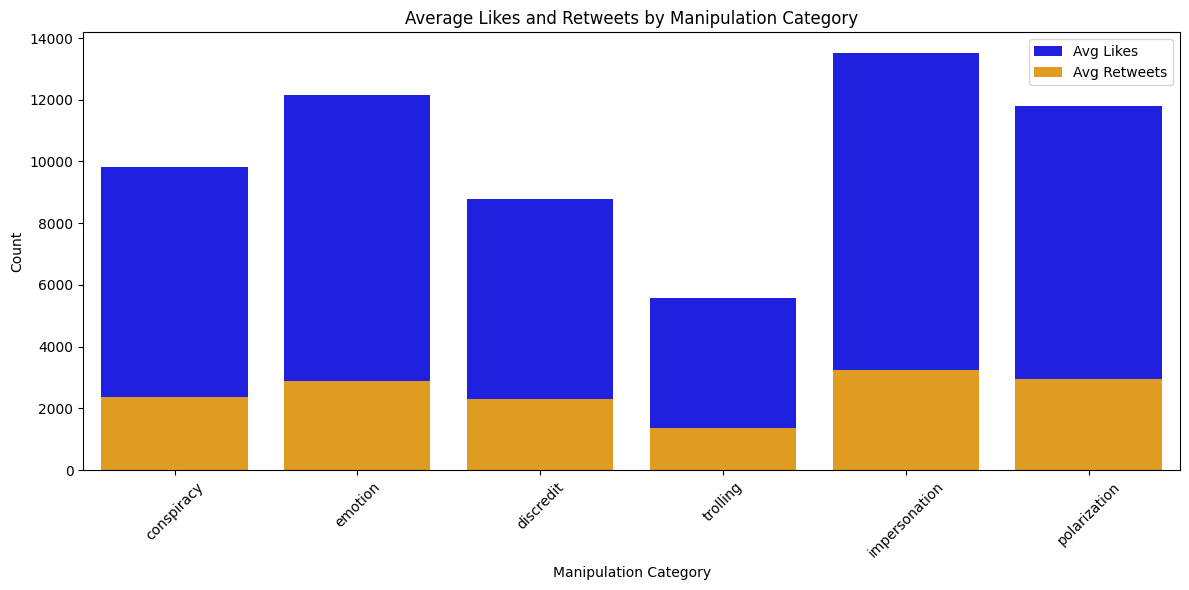

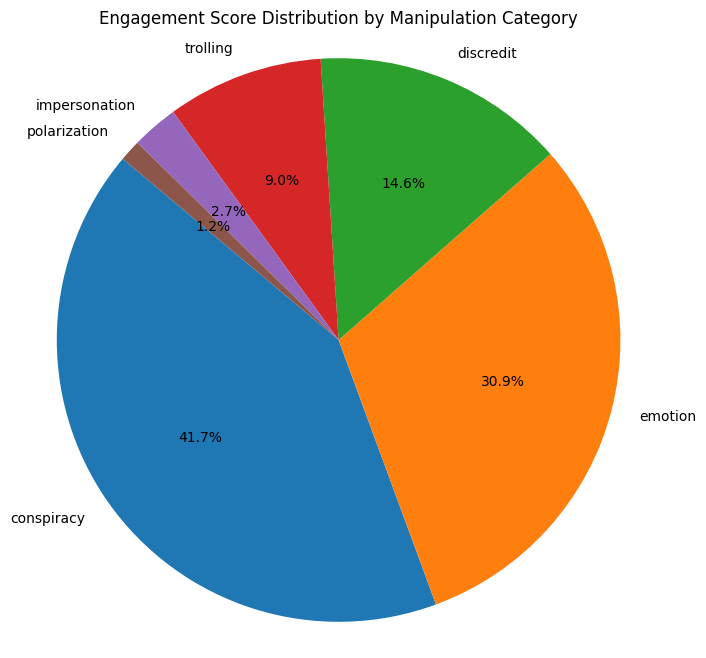

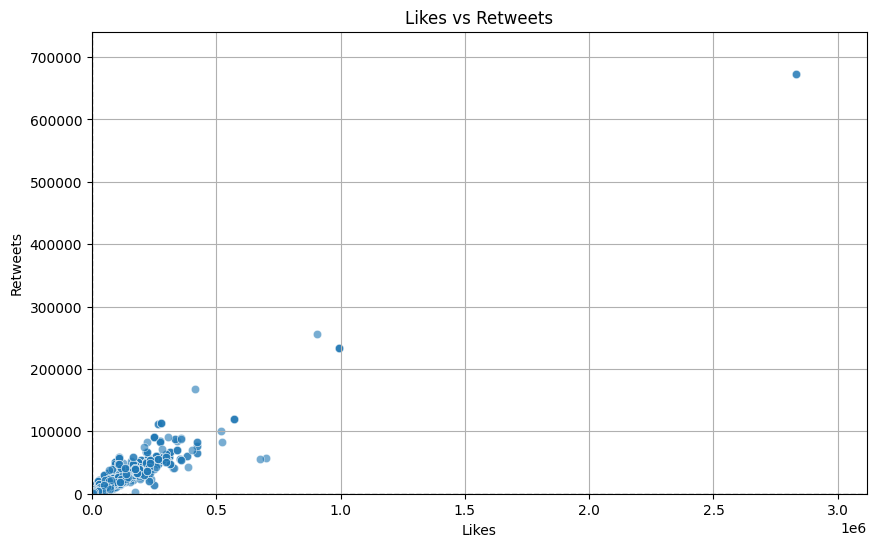

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def categorize_techniques(techniques):
    if pd.isna(techniques):
        return []
    categories = ["polarization", "conspiracy", "emotion", "trolling", "impersonation", "discredit"]
    return [cat for cat in categories if cat in str(techniques).lower()]

def process_chunk(chunk):
    # Filter rows with more than 100 likes
    chunk = chunk[chunk['like_count'] > 100]

    # Categorize manipulation techniques, handling NaN values
    chunk['manipulation_categories'] = chunk['Cohere-Command-R-Plus'].fillna('').apply(categorize_techniques)

    # Explode the categories to create separate rows for each category
    chunk = chunk.explode('manipulation_categories')

    # Remove rows with empty categories
    chunk = chunk[chunk['manipulation_categories'] != '']

    # Add engagement ratio column
    chunk['engagement_ratio'] = chunk['retweet_count'] / chunk['like_count']

    return chunk

def calculate_engagement_metrics(df):
    # Group by manipulation category and calculate metrics
    engagement_metrics = df.groupby('manipulation_categories').agg({
        'like_count': ['mean', 'sum'],
        'retweet_count': ['mean', 'sum'],
        'engagement_ratio': 'mean'
    }).reset_index()

    # Flatten column names
    engagement_metrics.columns = ['Manipulation Category', 'Avg Likes', 'Total Likes', 'Avg Retweets', 'Total Retweets', 'Avg Engagement Ratio']

    # Calculate engagement score
    engagement_metrics['Engagement Score'] = engagement_metrics['Total Likes'] + engagement_metrics['Total Retweets']
    total_engagement = engagement_metrics['Engagement Score'].sum()
    engagement_metrics['Engagement Score (%)'] = (engagement_metrics['Engagement Score'] / total_engagement) * 100

    # Sort by Engagement Score in descending order
    engagement_metrics = engagement_metrics.sort_values('Engagement Score', ascending=False)

    # Calculate Pearson correlation between likes and retweets
    correlation = df['like_count'].corr(df['retweet_count'])

    return engagement_metrics, correlation

def visualize_engagement_metrics(engagement_metrics):
    # Bar plot for average likes and retweets
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Manipulation Category', y='Avg Likes', data=engagement_metrics, color='blue', label='Avg Likes')
    sns.barplot(x='Manipulation Category', y='Avg Retweets', data=engagement_metrics, color='orange', label='Avg Retweets')
    plt.title('Average Likes and Retweets by Manipulation Category')
    plt.xlabel('Manipulation Category')
    plt.ylabel('Count')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Pie chart for engagement score distribution
    plt.figure(figsize=(8, 8))
    plt.pie(engagement_metrics['Engagement Score'], labels=engagement_metrics['Manipulation Category'], autopct='%1.1f%%', startangle=140)
    plt.title('Engagement Score Distribution by Manipulation Category')
    plt.axis('equal')
    plt.show()

def plot_likes_vs_retweets(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='like_count', y='retweet_count', alpha=0.6)
    plt.title('Likes vs Retweets')
    plt.xlabel('Likes')
    plt.ylabel('Retweets')
    plt.axhline(0, color='grey', lw=1, ls='--')
    plt.axvline(0, color='grey', lw=1, ls='--')
    plt.xlim(0, df['like_count'].max()*1.1)
    plt.ylim(0, df['retweet_count'].max()*1.1)
    plt.grid()
    plt.show()

def main():
    input_file = 'fibvid_evaluation_multiple.csv'
    output_file = 'processed_fibvid_evaluation.csv'
    chunksize = 1000000  # Adjust based on available memory

    all_data = pd.DataFrame()

    # Read and process the CSV in chunks
    for i, chunk in enumerate(pd.read_csv(input_file, chunksize=chunksize)):
        print(f"Processing chunk {i+1}")

        try:
            processed_chunk = process_chunk(chunk)
            all_data = pd.concat([all_data, processed_chunk])

            # Write the processed chunk to the output file
            if i == 0:
                processed_chunk.to_csv(output_file, mode='w', index=False)
            else:
                processed_chunk.to_csv(output_file, mode='a', header=False, index=False)

        except Exception as e:
            print(f"Error processing chunk {i+1}: {str(e)}")
            continue

    print("Processing complete!")

    # Calculate and display engagement metrics
    engagement_metrics, correlation = calculate_engagement_metrics(all_data)

    print("\nEngagement Metrics by Manipulation Category:")
    print(engagement_metrics.to_string(index=False))
    print(f"\nPearson correlation between likes and retweets: {correlation:.4f}")

    # After calculating engagement metrics
    visualize_engagement_metrics(engagement_metrics)
    plot_likes_vs_retweets(all_data)

if __name__ == "__main__":
    main()


##Interpretation:
1. Conspiracy tweets are the most prevalent and impactful, accounting for 41.73% of total engagement. They have a high number of total likes and retweets, although their average engagement ratio is moderate.
2. Emotion-based tweets are the second most engaging, with 30.85% of total engagement. They have the second-highest average likes and retweets.
3. Discredit tweets come third in total engagement (14.55%) and have the second-highest average engagement ratio.
4. Trolling tweets have lower average likes and retweets but still account for 8.97% of total engagement due to their volume.
5. Impersonation tweets have the highest average likes, retweets, and engagement ratio, but their overall impact is lower (2.67% of total engagement) due to fewer tweets in this category.
6. Polarization tweets show high average engagement but have the lowest total engagement (1.23%), suggesting they are effective but less frequently used.

In summary, while conspiracy and emotion-based tweets dominate in terms of total engagement due to their volume, impersonation and polarization tweets appear to be the most effective on a per-tweet basis. This analysis suggests that the effectiveness of a manipulation technique isn’t solely about its average engagement, but also about how frequently it’s employed.

Depth related

Together do the sampling and then calculating the inter-rater reliability